In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [5]:
# Download csv of temp (F) and precip (inches) in July 2018 for Boulder, CO
#file_url = "https://ndownloader.figshare.com/files/12948515"
#et.data.get_data(url=file_url)

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'D:\STUDIA\Programowanie\EarthDataScience\DataForEarthOpenSourcePython\Chapter1\DATA'))

# Define relative path to file
file_path = os.path.join("downloads",
                         "july-2018-temperature-precip.csv")

# Import file into pandas dataframe
boulder_july_2018 = pd.read_csv(file_path)

In [6]:
# Display first few rows
boulder_july_2018.head()

,date,max_temp,precip
0,2018-07-01,87,0.00
1,2018-07-02,92,0.00
2,2018-07-03,90,-999.00
3,2018-07-04,87,0.00
4,2018-07-05,84,0.24


In [7]:
# View dataframe info
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      31 non-null     object 
 1   max_temp  31 non-null     int64  
 2   precip    31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


In [8]:
boulder_july_2018.dtypes

date         object
max_temp      int64
precip      float64
dtype: object

In [10]:
type(boulder_july_2018['date'][0])

str

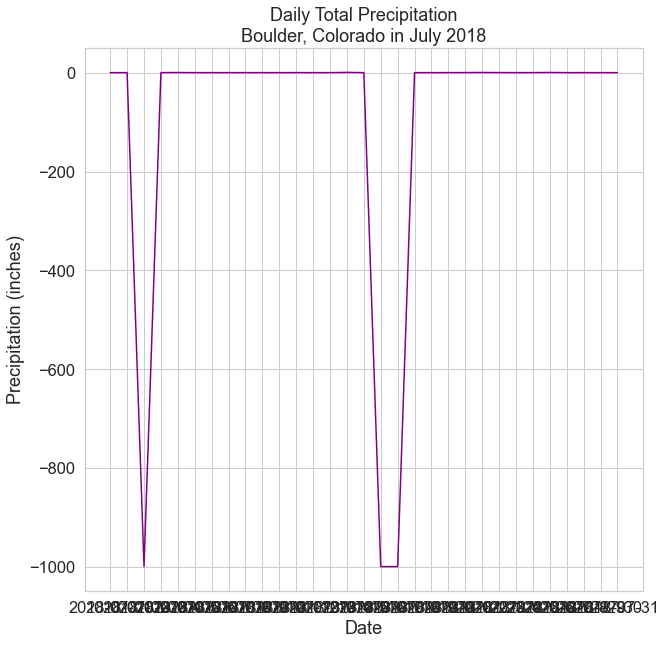

In [11]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(boulder_july_2018['date'],
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

In [13]:
#read with date type

boulder_july_2018 = pd.read_csv(file_path, parse_dates = ['date'], index_col = ['date'])
boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,-999.00
2018-07-04,87,0.00
2018-07-05,84,0.24


In [14]:
# View dataframe info
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 to 2018-07-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  31 non-null     int64  
 1   precip    31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes


In [15]:
# View column data types
boulder_july_2018.dtypes

max_temp      int64
precip      float64
dtype: object

In [16]:
# View column data types
boulder_july_2018.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', name='date', freq=None)

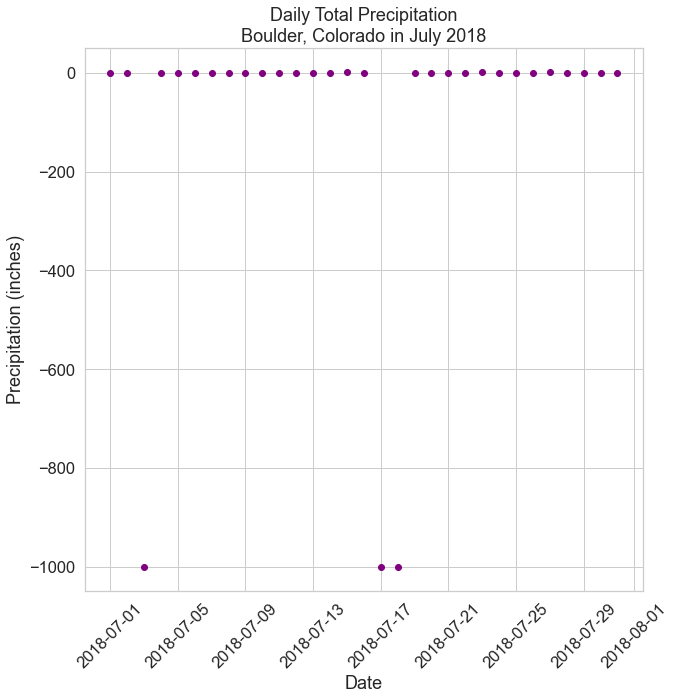

In [19]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")
# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

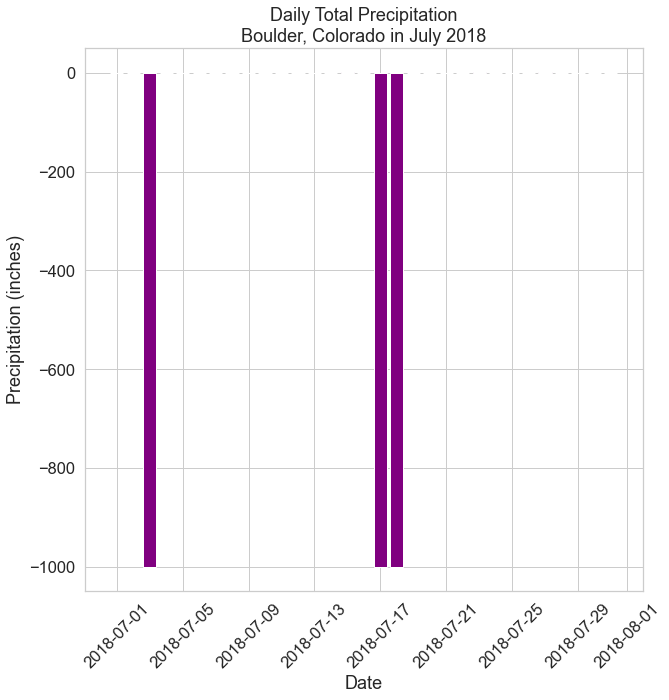

In [18]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [20]:
# Both min and mean are affected by these negative, no data values
boulder_july_2018.describe()

,max_temp,precip
count,31.000000,31.000000
mean,88.129032,-96.618065
std,6.626925,300.256388
min,75.000000,-999.000000
25%,84.000000,0.000000
50%,88.000000,0.000000
75%,94.000000,0.050000
max,97.000000,0.450000


In [21]:
# Import data using datetime and no data value
boulder_july_2018 = pd.read_csv(file_path,
                                parse_dates=['date'],
                                index_col=['date'],
                                na_values=[-999])

boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,NaN
2018-07-04,87,0.00
2018-07-05,84,0.24


In [22]:
# Both min and mean now accurately reflect the true data
boulder_july_2018.describe()

,max_temp,precip
count,31.000000,28.000000
mean,88.129032,0.065714
std,6.626925,0.120936
min,75.000000,0.000000
25%,84.000000,0.000000
50%,88.000000,0.000000
75%,94.000000,0.055000
max,97.000000,0.450000


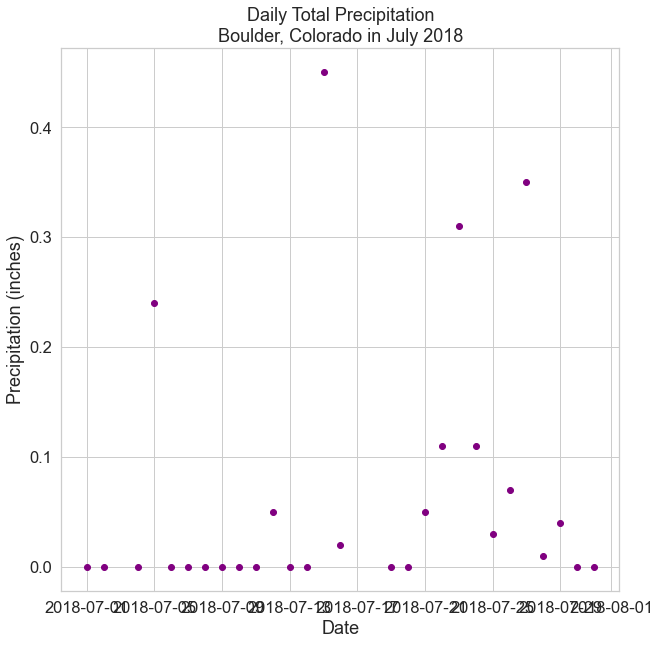

In [23]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()